In [356]:
#importing the necessary functions to utilise in the analysis
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from statistics import mean
import warnings
warnings.filterwarnings('ignore')

In [357]:
#importing the data to use
data_unprocessed = pd.read_csv('sales_forecasting.csv')

#removing data when stores are closed; when 'Open'=0
data = data_unprocessed.drop(data_unprocessed[data_unprocessed['Open'] == 0].index)

In [358]:
#Desribing top 20%
#sorting the values of Sales; descending
data_2 = data.sort_values(by=['Sales'],ascending=False)

#making dummy column to only take the top 20% of sales.
data_2.insert(1,'Dummy_variable',range(0,0+len(data)))

#taking the top 20% of sales
data_3 = data_2[data_2['Dummy_variable'] <= 168878]

#dropping the dummy column and 'day of the week'
fin_data = data_3.drop(columns = ['Dummy_variable','DayOfWeek'])

#descriptive statistics of the top 20% of sales
fin_data.describe()

,Store,Sales,Customers,Open,Promo,SchoolHoliday
count,168879.000000,168879.000000,168879.000000,168879.0,168879.000000,168879.000000
mean,566.774720,11723.655961,1259.206971,1.0,0.723856,0.217570
std,311.262663,2938.426164,549.706089,0.0,0.447090,0.412595
min,1.000000,8957.000000,216.000000,1.0,0.000000,0.000000
25%,320.000000,9718.000000,910.000000,1.0,0.000000,0.000000
50%,546.000000,10771.000000,1117.000000,1.0,1.000000,0.000000
75%,821.000000,12668.000000,1406.000000,1.0,1.000000,0.000000
max,1115.000000,41551.000000,7388.000000,1.0,1.000000,1.000000


In [359]:
#Descriptive statistics of all the stores
data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.0,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,1.0,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.0,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,1.0,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,1.0,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.0,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.0,1.000000,1.000000


#Descriptive statistics between top 20% and overall comparison paragraph

In order to get a general understanding of the performance of stores, descriptive statistics were used to compare the difference between the top 20% of stores in terms of sales and all the stores. One of the largest difference is between the mean in sales as the top 20% of stores have an average of 11,723.66 sales whereas overall, the average is only 6,955.51, approximately a 4000 sale difference. The median for sales are also 4000 sales higher for the top 20% compared to the overall business. This is a good indicator as the top performing stores are performing signficantly better compared to the rest, showing that some stores are more successful than others. 

In [362]:
#descriptive statistics of the year 2013
data_year_2013.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Years,Months,Quarter
count,337943.000000,337943.000000,337943.000000,337943.000000,337943.0,337943.000000,337943.000000,337943.0,337943.000000,337943.000000
mean,558.014556,3.520301,6814.392025,757.537292,1.0,0.434967,0.204425,2013.0,6.523372,2.512909
std,321.629824,1.728597,3115.671303,403.472897,0.0,0.495753,0.403281,0.0,3.435883,1.114715
min,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,2013.0,1.000000,1.000000
25%,280.000000,2.000000,4719.000000,510.000000,1.0,0.000000,0.000000,2013.0,4.000000,2.000000
50%,558.000000,3.000000,6218.000000,670.000000,1.0,0.000000,0.000000,2013.0,7.000000,3.000000
75%,836.000000,5.000000,8190.000000,889.000000,1.0,1.000000,0.000000,2013.0,9.000000,3.000000
max,1115.000000,7.000000,38025.000000,7388.000000,1.0,1.000000,1.000000,2013.0,12.000000,4.000000


In [363]:
#descriptive statistics of the year 2014
data_year_2014.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Years,Months,Quarter
count,310417.000000,310417.000000,310417.000000,310417.000000,310417.0,310417.000000,310417.000000,310417.0,310417.000000,310417.000000
mean,559.107346,3.512833,7025.404201,774.728739,1.0,0.445923,0.202276,2014.0,6.259486,2.422090
std,321.802743,1.722869,3129.253571,406.612303,0.0,0.497068,0.401698,0.0,3.440089,1.115568
min,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,2014.0,1.000000,1.000000
25%,282.000000,2.000000,4903.000000,528.000000,1.0,0.000000,0.000000,2014.0,3.000000,1.000000
50%,558.000000,3.000000,6427.000000,686.000000,1.0,0.000000,0.000000,2014.0,6.000000,2.000000
75%,838.000000,5.000000,8458.000000,906.000000,1.0,1.000000,0.000000,2014.0,9.000000,3.000000
max,1115.000000,7.000000,38037.000000,5494.000000,1.0,1.000000,1.000000,2014.0,12.000000,4.000000


In [364]:
#descriptive statistics of the year 2013
#2015 only has half of the year's data
data_year_2015.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Years,Months,Quarter
count,196032.000000,196032.000000,196032.000000,196032.000000,196032.0,196032.000000,196032.000000,196032.0,196032.000000,196032.000000
mean,558.043115,3.532388,7088.126648,752.674864,1.0,0.466659,0.161111,2015.0,4.022379,1.722382
std,321.795523,1.716441,3034.237397,388.081103,0.0,0.498888,0.367635,0.0,2.027934,0.713119
min,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,2015.0,1.000000,1.000000
25%,279.000000,2.000000,5042.000000,520.000000,1.0,0.000000,0.000000,2015.0,2.000000,1.000000
50%,558.000000,4.000000,6530.000000,670.000000,1.0,0.000000,0.000000,2015.0,4.000000,2.000000
75%,837.000000,5.000000,8486.000000,877.000000,1.0,1.000000,0.000000,2015.0,6.000000,2.000000
max,1115.000000,7.000000,41551.000000,5458.000000,1.0,1.000000,1.000000,2015.0,7.000000,3.000000


#Comparing the descriptive statistics for the years, 2013, 2014, 2015

By running descriptive statistics on each individual year, we can observe whether the general performance of each year increases or not. Comparing the mean of sales across each other, they are fairly similar but is slightly increasing over the year as the average sales are 6814.39, 7025.40, 7088.13 for 2013, 2014, and 2015 respectively, suggesting small growth in sales over time. An important figure that distinguishes the years from each other is the max sales as in 2013 and 2014, the highest recorded sales was around 38,000 but in 2015, there was a record of around 41,600 sales in that year. This must be due to a special event that occurred during a specific day, resulting in such a high amount of sales. 

In [365]:
#Coverting the 'date' column into an easier format to use 
data['Date'] = pd.to_datetime(data['Date'],dayfirst = True)
data.Date[1].month

7

In [366]:
#adding a 'years' column to allocate each row into a year
data['Years'] = data.Date.apply(lambda x:x.year)
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Years
0,1,5,2015-07-31,5263,555,1,1,0,1,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,2015
...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,2013
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,2013
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,2013
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,2013


In [367]:
#Subsetting the data for only 2015 rows
data_year_2015 = data[data['Years'] == 2015]
data_year_2015.sum(axis=0)

Store                                                    109394308
DayOfWeek                                                   692461
Sales                                                   1389499643
Customers                                                147548359
Open                                                        196032
Promo                                                        91480
StateHoliday     0000000000000000000000000000000000000000000000...
SchoolHoliday                                                31583
Years                                                    395004480
dtype: object

In [368]:
#Subsetting the data for only 2014 rows
data_year_2014 = data[data['Years'] == 2014]
data_year_2014.sum(axis=0)

Store             173556425
DayOfWeek           1090443
Sales            2180804896
Customers         240488971
Open                 310417
Promo                138422
SchoolHoliday         62790
Years             625179838
dtype: int64

In [369]:
#Subsetting the data for only 2013 rows
data_year_2013 = data[data['Years'] == 2013]
data_year_2013.sum(axis=0)

Store                                                    188577113
DayOfWeek                                                  1189661
Sales                                                   2302876084
Customers                                                256004425
Open                                                        337943
Promo                                                       146994
StateHoliday     0000000000000000000000000000000000000000000000...
SchoolHoliday                                                69084
Years                                                    680279259
dtype: object

In [371]:
#Splitting the 2013 data into the yearly quarters
data_year_2013['Months'] = data.Date.apply(lambda x:x.month)
data_year_2013['Quarter'] = data_year_2013['Date'].dt.quarter
data_year_2013_1ter = data_year_2013[data_year_2013['Quarter'] == 1]
data_year_2013_2ter = data_year_2013[data_year_2013['Quarter'] == 2]
data_year_2013_3ter = data_year_2013[data_year_2013['Quarter'] == 3]
data_year_2013_4ter = data_year_2013[data_year_2013['Quarter'] == 4]

In [372]:
#Splitting the 2014 data into the yearly quarters
data_year_2014['Months'] = data.Date.apply(lambda x:x.month)
data_year_2014['Quarter'] = data_year_2014['Date'].dt.quarter
data_year_2014_1ter = data_year_2014[data_year_2014['Quarter'] == 1]
data_year_2014_2ter = data_year_2014[data_year_2014['Quarter'] == 2]
data_year_2014_3ter = data_year_2014[data_year_2014['Quarter'] == 3]
data_year_2014_4ter = data_year_2014[data_year_2014['Quarter'] == 4]

In [373]:
#Splitting the 2015 data into the yearly quarters
#The third Quarter only has one month worth of data
data_year_2015['Months'] = data.Date.apply(lambda x:x.month)
data_year_2015['Quarter'] = data_year_2015['Date'].dt.quarter
data_year_2015_1ter = data_year_2015[data_year_2015['Quarter'] == 1]
data_year_2015_2ter = data_year_2015[data_year_2015['Quarter'] == 2]
data_year_2015_3ter = data_year_2015[data_year_2015['Quarter'] == 3]

<AxesSubplot:xlabel='Years', ylabel='Sales'>

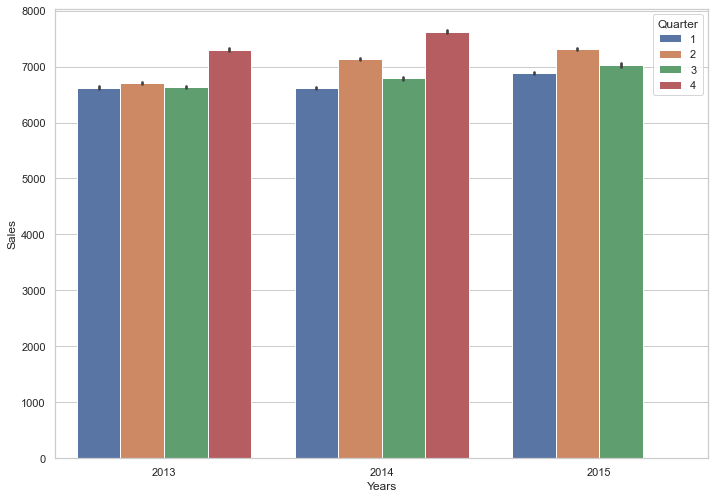

In [402]:
#Creating a barplot for total sales in each yearly quarter
data['Months'] = data.Date.apply(lambda x:x.month)
data['Quarter'] = data['Date'].dt.quarter
sns.set_theme(style="whitegrid")
sns.barplot(data=data, x='Years',y='Sales',hue='Quarter')

#barchart paragraph

To explore the movement of sales overtime, we created a barchart of the total sales in each yearly quarter to observe whether sales were increasing or not over the two and a half years. Evaluating the barchart, the 4th quarter in 2013 and 2014 are considerably higher than the other quarters, possibly due to holidays that are at the end of the year such as Christmas, attracting more people to visit the stores. Through this observation, Rossmann stores should prepare accordingly during the 4th quarter of the year, ensuring they have enough inventory during this time and should be focusing on attracting more people whether it's through more advertisements or promos to further increase the amount of sales during that part of the year as they are more likely to reach more consumers during this period. The graph also shows that there is a slight increase in between years as the bars in 2015 are overall, slightly higher than the bars in 2014, proving a small amount of growth in the company's sales. However, their growth is minuscule.

In [378]:
#Combining the data sets to show the average sales in each month
data_year_2013_gp=data_year_2013.groupby(['Months']).mean() 
data_year_2014_gp=data_year_2014.groupby(['Months']).mean()
data_year_2015_gp=data_year_2015.groupby(['Months']).mean()
avg_month=data_year_2013_gp.append(data_year_2014_gp)
avg_month_fin = avg_month.append(data_year_2015_gp)
avg_month_fin.insert(1,'Month',range(1,1+len(avg_month_fin)))
avg_month_fin.reset_index(drop=True)

,Store,Month,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Years,Quarter
0,558.403409,1,3.508677,6239.641380,705.962209,1.0,0.383214,0.134608,2013.0,1.0
1,557.929693,2,3.513061,6428.597796,721.225799,1.0,0.415995,0.099539,2013.0,1.0
2,557.914635,3,3.616198,7212.834110,787.661767,1.0,0.557794,0.164061,2013.0,1.0
3,558.081133,4,3.453049,6579.319656,749.008788,1.0,0.477367,0.154017,2013.0,2.0
4,557.913251,5,3.670598,7076.217960,790.927639,1.0,0.483818,0.130448,2013.0,2.0
5,557.746904,6,3.618531,6467.051428,732.697946,1.0,0.397788,0.054935,2013.0,2.0
6,558.541106,7,3.349002,6923.154611,758.206093,1.0,0.479281,0.470231,2013.0,3.0
7,558.131957,8,3.679034,6595.927627,743.188410,1.0,0.439867,0.575121,2013.0,3.0
8,557.722419,9,3.421214,6363.388121,727.280333,1.0,0.397841,0.088346,2013.0,3.0
9,557.900828,10,3.435909,6473.347016,737.194136,1.0,0.384615,0.306140,2013.0,4.0


In [379]:
#Model using average sales per month
X=avg_month_fin[['Month']]
Y=avg_month_fin['Sales']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1) 
linear = LinearRegression(fit_intercept=True) # instantatiate the linear regression model
linear.fit(X_train,Y_train) # fit the data to the model
training_score = linear.score(X_train,Y_train) # calculate rsq for the training set
# use the independent variables for the testing set to predict the target variable
preds_linear = linear.predict(X_test) 
# calculate the correlation of the predicted and actual target variables
rsquared_linear = r2_score(Y_test,preds_linear) 
# print the training and testing scores
print("Training score is",np.round(training_score, 3))
print("Testing score is",np.round(rsquared_linear, 3))
print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))

Training score is 0.092
Testing score is 0.117
Coefficients are [31.243]
Intercept is 6542.135


TypeError: expected 1D vector for x

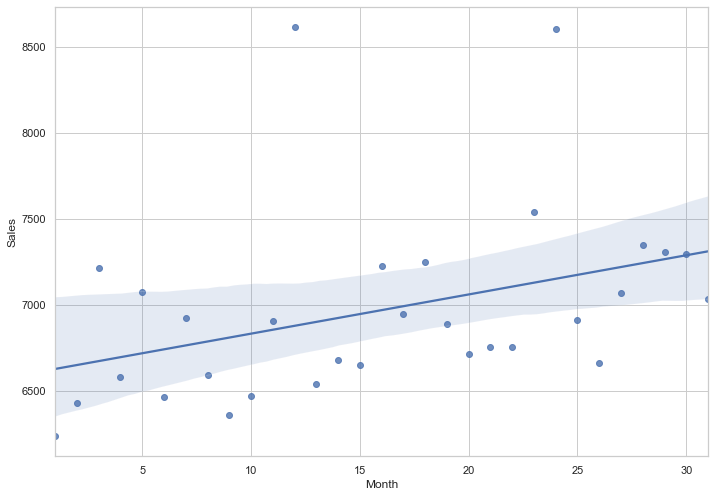

In [380]:
#sketching a line of best fit on the average sales in each month
sns.regplot(x=X, y=Y);
p1 = np.poly1d(np.polyfit(X, Y, 1))

In [381]:
#Finding the index where the outliers are in the regplot
avg_month_fin.index[avg_month_fin['Sales']>8500]

Int64Index([12, 12], dtype='int64', name='Months')

TypeError: expected 1D vector for x

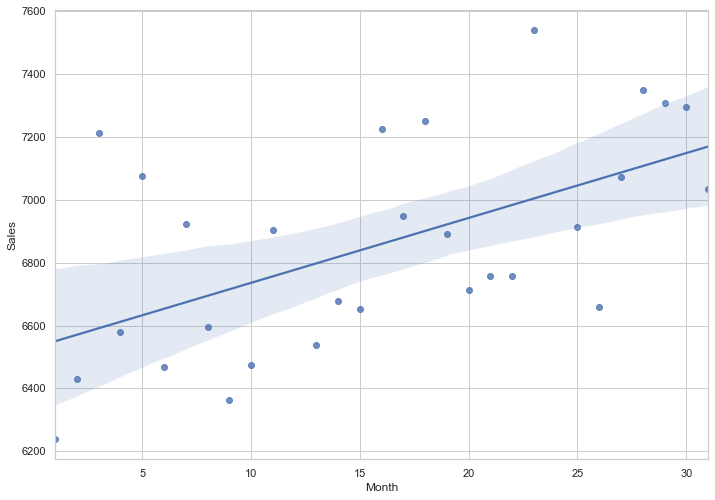

In [385]:
#dropping the outliers in the dataset with averales sales in each month
avg_2 = avg_month_fin.drop([12])
X=avg_2[['Month']]
Y=avg_2['Sales']
sns.regplot(x=X, y=Y);
p1 = np.poly1d(np.polyfit(X, Y, 1))

In [417]:
#Creating a model using the average sales in each month. 
X=avg_2[['Month']]
Y=avg_2['Sales']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8,random_state=3) 
linear = LinearRegression(fit_intercept=True) # instantatiate the linear regression model
linear.fit(X_train,Y_train) # fit the data to the model
training_score = linear.score(X_train,Y_train) # calculate rsq for the training set
# use the independent variables for the testing set to predict the target variable
preds_linear = linear.predict(X_test) 
# calculate the correlation of the predicted and actual target variables
rsquared_linear = r2_score(Y_test,preds_linear) 
# print the training and testing scores
print("Training score is",np.round(training_score, 3))
print("Testing score is",np.round(rsquared_linear, 3))
print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))

Training score is 0.887
Testing score is 0.094
Coefficients are [25.16]
Intercept is 6536.758


#the model paragraph

In order to create a model that could be used to predict the sales in the future, we had to subset the data and get the variables 'time' and  'sales' together and perform the modelling functions with them. With the data set containing records of each day for 2 and half years, the data set was too large to use while it was unprocessed. Upon consideration, the only realistic ways to subset the data and use for modelling was to either track the performance of one company from 2013 to 2015 (this method would be biased as one company does not reflect how overall sample space performs) or to find the average sales across the two and half years. Our aim through this modelling was to predict how many sales a store could achieve in the next month and so in the modelling, we used the average sales in each month from January 2013- July 2015. Plotting the average sales of each month (there was a total number of 31 months) in a scatterplot, there were two outliers which would have had a drastic effect on the testing and training score (the r squared values). Therefore, we removed the two outliers which were the average sales in December and proceeded to perform the modelling on the further processed data set. We split the dataset to use 80% as a training set and 20% as the testing data and using the functions in python, we obtained the coeffcient and intercept of a linear regression line. The coefficient was 25.16 and the intercept was 6536.758. It can be concluded  through using this regression model, that for every month, the sales would increase by 25.16 and at month 1 (January 2013), the average sales recorded would be 6536.758 . However, this is not accurate as the average sales in January 2013 was 6239.641, a 297.117 sale difference. Since the coefficient is positive, this shows that overtime, there is an increase in sales, indicating small growth in their sales. Upon further analysis, the training score and testing score respectively was 0.887 and 0.094. While the training score was considerably high as it was close to one (meaning the data was fairly accurate when put against the training data), the testing score was extremely low as it was close to 0, indicating that the model performed horribly when put against new data. However, if we were to predict the sales in the next month, there would be an average of 7341.88 sales which is most likely not accurate due to the testing score of the model. The extremely low testing score is most likely due to the extremely scattered averages between each month, causing the model to be unable to create a strong correlation between the variables. Rather, the factors that really influence the sales is the seasonality of the year, causing the sales to fluctuate during special events such as holidays. 



#participation paragraph

Steven Hadiwidjaja - Helped pre-process the data, created the descriptive statistics, helped in the creating plots(created the bar chart of of total sales in each yearly quarter), created the model for prediction, helped write the parts of the report such as the modelling, preprocessing and the barchart.

#Preprocessing the data paragraph

Before using the data, we filtered through the dataset in order to ensure we were only using meaningful data. This meant we had to remove the rows where the stores were closed as they do not provide any value in our analysis and only made the dataset unnecessarily large. For easier use, we converted the date column into a more usable format to make subsetting the data easier throughout the project. To also aid in subsetting the data, we added columns such as 'quarters', 'months' and a dummy column in order for us to be able to take specific rows when we needed them in our analysis.